# K-Means: Buscar similitudes

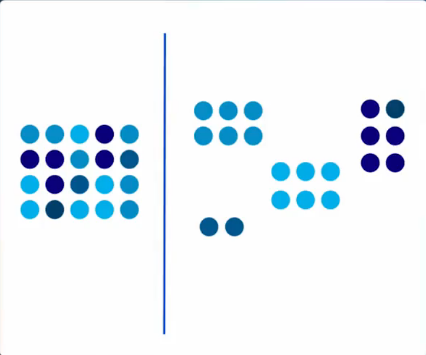

Algoritmo no supervisado.
Crea K grupos a partir de observaciones de un set de datos.
Trata información que no tiene etiquetas asignadas.
Agrupa información basada en sus características.
K = centroides
Aproximación a K: método del codo
Aplicaciones:
Segmentación por comportamiento:
por historial de compras
actividad en una aplicación móvil, web
Definir personas basadas en sus intereses.
Crear perfiles basado en el monitoreo de actividad.
Ordenando medidas de sensores:
Detecta tipos de actividades en sensores de movimiento.
Grupos de imágenes.
Separar audio.
Identificar grupos en monitoreo de salud.



En base a la cercania a los centroides se parecera mas a ese grupo hasta que se encuentra una categoria para cada uno

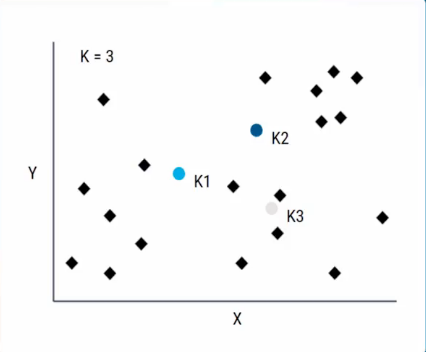

# **Metodo del codo: Encontrar segun un analisis cuantos K utilizar en el algoritmo**

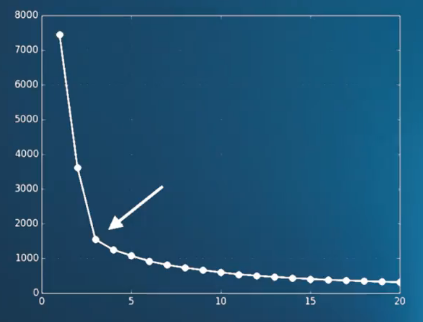

## Iris: DataSet a utilizar

- 50 muestras de cada especie

- Largo y ancho del sépalo y pétalo

- Virginica, Versicolor y setosa

In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd


In [2]:
import matplotlib.pyplot as plt

iris = datasets.load_iris()

In [3]:
X_iris = iris.data
Y_iris = iris.target

In [5]:
x = pd.DataFrame(iris.data, columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])

y = pd.DataFrame(iris.target, columns = ["Target"])


In [6]:
x.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Petal Width')

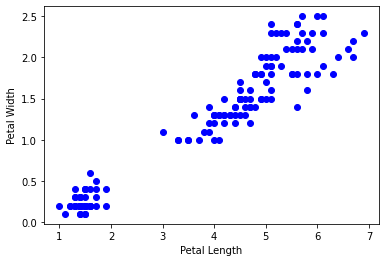

In [7]:
plt.scatter(x["Petal Length"], x["Petal Width"], c= "blue")
plt.xlabel("Petal Length", fontsize = 10)
plt.ylabel("Petal Width", fontsize = 10)

Dividimos en base a un centroide entrenando

# **Saber la cantidad de Clusters en base al metodo del codo**

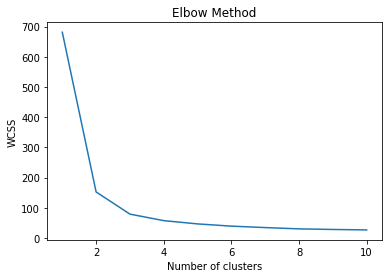

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

La cantidad de clusters indicada es 3

**Otro metodo para saber la cantidad de clusters**

Text(0.5, 1.0, 'Cálculo de K')

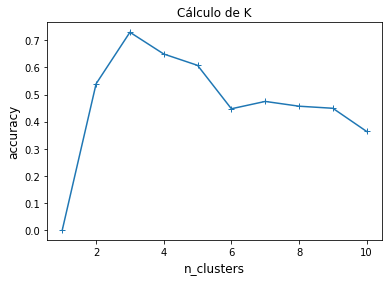

In [23]:
bow_accuracy_array = []
for n in range(1,11):
  Kmodel = KMeans(n_clusters=n, max_iter=1000)
  Kmodel.fit(x)
  KLabels = Kmodel.labels_
  predict = Kmodel.predict(x)
  bow_accuracy_array.append(metrics.adjusted_rand_score(iris.target, predict))
plt.plot(range(1,11),bow_accuracy_array, marker='+')
plt.xlabel('n_clusters', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title('Cálculo de K')

# **Creamos y evaluamos el modelo**

In [18]:
model = KMeans(n_clusters=3, max_iter = 1000)
model.fit(x)
y_labels = model.labels_

Estos son los puntos encontrados en categorias

In [19]:
y_kmeans = model.predict(x)
print ("Predicciones ", y_kmeans)

Predicciones  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [20]:
#Precision del 73%

from sklearn import metrics

accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)

0.7302382722834697


# **Graficamos**

Text(0, 0.5, 'Petal Length')

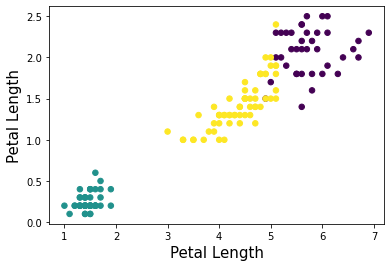

In [25]:
#Obtenemos los atributos visuales, S=tamaño de puntos c= para su color correspondiente
plt.scatter(x["Petal Length"], x["Petal Width"], c=y_kmeans, s=30)
plt.xlabel("Petal Length", fontsize = 15)
plt.ylabel("Petal Length", fontsize = 15)
